# Assignment 2 (K mean+ Aglomerative + Purity + DBSCAN)


## Assignment instructions

1. Carefully read and follow all instructions.
2. No Late submisison Would be Accepted
3. You can search the basics of python, concepts, and syntax online. Copy solution from internet would result into 0.
4. Do keep in mind that sharing the code, discussing it is highly unethical, and all actions would be considered as plagiarism.
5. Plagiarism will result in serious penalty
6. I'll eveluate on the basis of resultant as you guys are using built in functions. 
7. keep code clean and precise, its part of your assignment grading. Doing a hectic code would result in -ve marking

###### Instruction - rename this file as rollnumber_ass2; for example
###### 20l-1212_ass2

In [50]:
# import necessory libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.cluster import KMeans
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn import metrics


# Task1: 
You need to create blobs with onlt 2 dimentions. 

Number of nodes equal to your roll number

#### eg: 20l-1212= 1212 nodes

All of you understood the code of blob and circle that have been demonstrated in labs 

Manipulate the value in that code and regenerate 5 datasets, such those datsets are near approximation of below images

## NOTE : The outputs fields are also shared.

##### Dataset 1
![img1.PNG](attachment:img1.PNG)

##### Dataset 2
![img2.PNG](attachment:img2.PNG)

##### Dataset 3
![img3.PNG](attachment:img3.PNG)

##### Dataset 4
![img4.PNG](attachment:img4.PNG)

##### Dataset 5
![img5.PNG](attachment:img5.PNG)

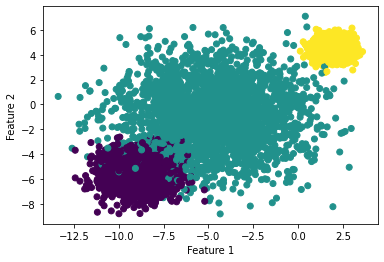

In [51]:
X1, y1 = make_blobs(n_samples=7693, cluster_std=[1.0, 2.5, 0.5], random_state=170)

X1[y1 == 2, 1] += 4

X1[y1 == 1, 1] -= 1

plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


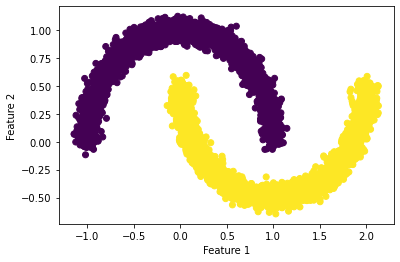

In [52]:
X2, y2 = make_moons(n_samples=7693, shuffle=True, noise=0.05, random_state=42)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

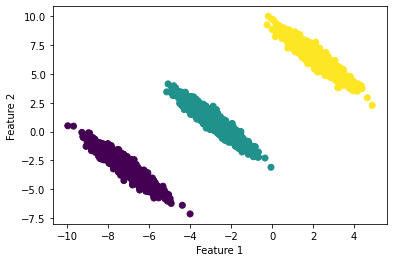

In [53]:
random_state = 170
X3, y3 = make_blobs(n_samples=7693, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X3, transformation)
X3, y3 = (X_aniso, y3)

x_means = [np.mean(X3[y3 == i, 0]) for i in range(3)]
X3[y3 == 2, 0] -= (x_means[2] - x_means[1])
X3[y3 == 2, 1] += (x_means[2] - x_means[0])
X3[y3 == 0, 0] -= 4
X3[y3 == 0, 1] -= 4
X3[y3 == 1, 1] -= 2
X3[y3 == 2, 0] += 5
X3[y3 == 2, 1] += 3

plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


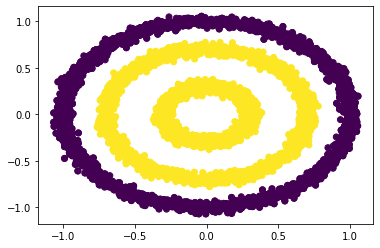

In [54]:
X_small, y_small = make_circles(n_samples=3846, random_state=4, noise=0.03, factor=0.3)
X_big, y_big = make_circles(n_samples=3847, random_state=4, noise=0.03, factor=0.7)
X4 = pd.DataFrame(np.vstack([X_small, X_big]))
y4 = pd.DataFrame(np.hstack([y_small, y_big])) 
plt.scatter(X4[0],X4[1], c= y4)


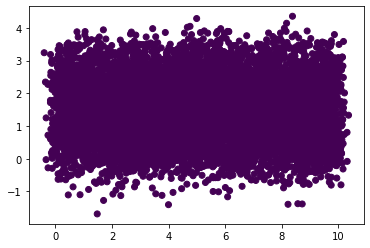

In [55]:
WIDTH = 10
HEIGHT = 3

x = np.random.uniform(low=0, high=WIDTH, size=7693)
y = np.random.uniform(low=0, high=HEIGHT, size=7693)

x += np.random.normal(0, 0.2, size=len(x))
y += np.random.normal(0, 0.5, size=len(y))

X5 = np.column_stack((x, y))
y5 = np.ones(len(X5)) 

plt.scatter(X5[:, 0], X5[:, 1], c=y5)

plt.show()


# Task2 (Time+ Purity + Plot):
Nice work! Pat on you shoulder

#### Part(A)

Now lets use all of learnt functions from previous labs and apply each and every one of them on these 5 datsets.

1. Kmean
2. Aglomerative (single linkage)
3. Aglomerative (Avg linkage)
4. Aglomerative (Complete linkage)
5. Dbscan
    * Run for different values of the number of clusters.

You also need to print purity at the end of each plot & don't forget to report the time it takes by each algo in each

After each output state your conclusive sentence about it


### Note: There are total 25 outputs, each with 2 fields (time & purity). Displaying output with default colors would results in 0 for that section

In [56]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

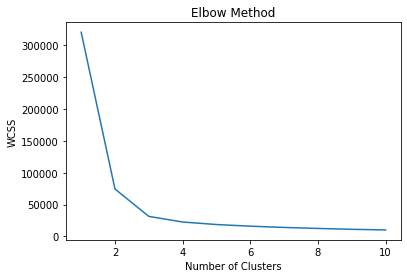

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


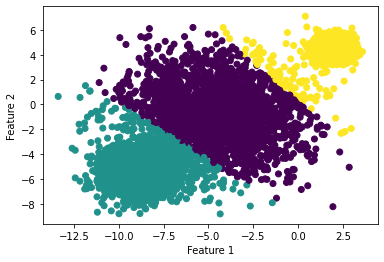

Time is: 0.1461200714111328
Purity is: 0.9448849603535682


In [57]:
# K mean - case 1
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X1)
kmeans_time = time.time() - start_time
purity = purity_score(y1, labels)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X1[:, 0], X1[:, 1], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()
print('Time is:',kmeans_time)
print('Purity is:',purity)
#conclusive sentence
#Kmeans Algorithm has performed well since the datset is well separated and have distinct clusters with different standard deviations


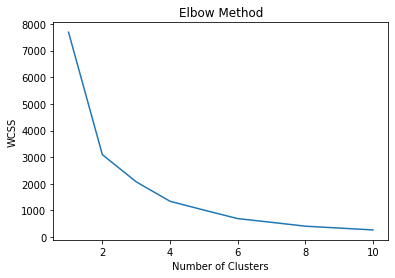

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


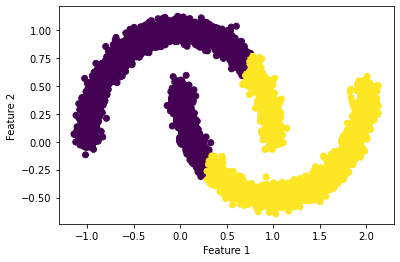

Time is: 0.21640491485595703
Purity is: 0.7528922396984271


In [58]:
# K mean - case 2
# Code which output time, purity, distiniugable plot 

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X2)
kmeans_time = time.time() - start_time
purity = purity_score(y2, labels)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X2[:, 0], X2[:, 1], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()
print('Time is:',kmeans_time)
print('Purity is:',purity)
#conclusive line
#Performance of Kmeans is slightly better but it couldnt identify the dense regions properly

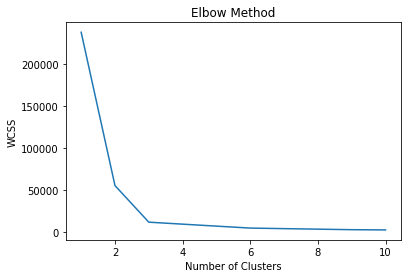

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


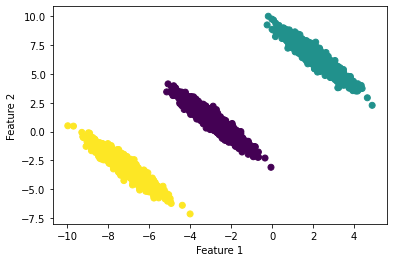

Time is: 0.446136474609375
Purity is: 1.0


In [59]:
# K mean - case 3
# Code which output  time, purity, distiniugable plot 

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X3)
kmeans_time = time.time() - start_time
purity = purity_score(y3, labels)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X3[:, 0], X3[:, 1], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()
print('Time is:',kmeans_time)
print('Purity is:',purity)
#conclusive line
#The performance of Kmeans are excellent as seen in purity as points are well seprated.

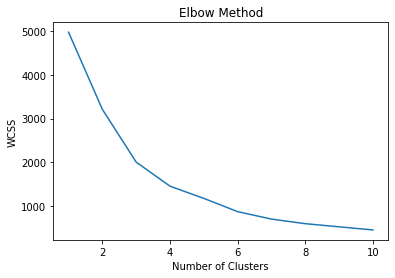

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


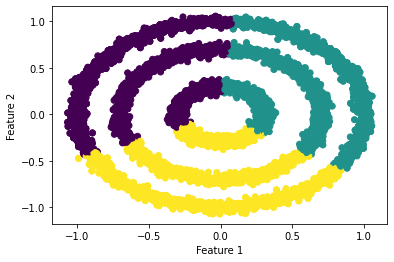

Time is: 0.14302325248718262
Purity is: 0.5044845963863253


In [60]:
# K mean - case 4
# Code which output time, purity, distiniugable plot 

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X4)
kmeans_time = time.time() - start_time
purity = purity_score(y4, labels)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X4[0], X4[1], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()
print('Time is:',kmeans_time)
print('Purity is:',purity)
#conclusive line
#The performance of Kmeans is poor as it could'nt really distinguish the dense regions properly

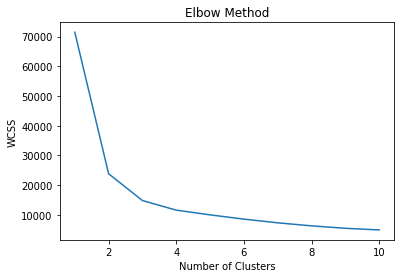

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


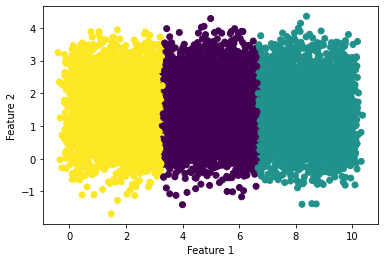

Time is: 0.19281435012817383
Purity is: 1.0


In [61]:
# K mean - case 5
# Code which output time, purity, distiniugable plot 

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X5)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X5)
kmeans_time = time.time() - start_time
purity = purity_score(y5, labels)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X5[:,0], X5[:,1], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()
print('Time is:',kmeans_time)
print('Purity is:',purity)
#conclusive line
#The performance of Kmeans is excellent as seen with 100% purity it has identified the clusters properly.

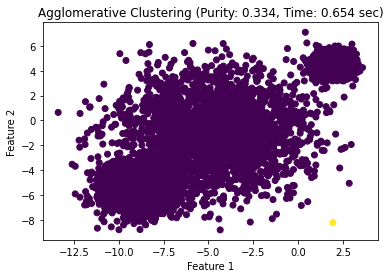

In [62]:
# Aglomerative 1 - case 1
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage ='single')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X1)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y1, clustering.labels_)

# Plot the clustered data
plt.scatter(X1[:, 0], X1[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#Agglomerative clustering with single linkage is not effective for the given dataset since it tends to create long and thin clusters and can be sensitive to noise and outliers.

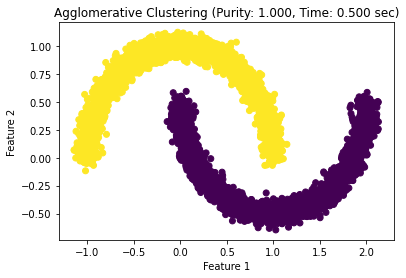

In [63]:
# Aglomerative 1 - case 2
# Code whihc ourput time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage='single')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X2)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y2, clustering.labels_)

# Plot the clustered data
plt.scatter(X2[:, 0], X2[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# the performance of clustering is excellent as seen by 100% purity. It has perfectly identified the clusters.

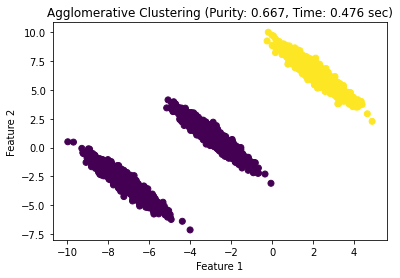

In [64]:
# Aglomerative 1 - case 3
# Code whihc ourput time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage='single')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X3)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y3, clustering.labels_)

# Plot the clustered data
plt.scatter(X3[:,0], X3[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#The performance of clustering is average. it has successfully identified one cluster but not the other two.

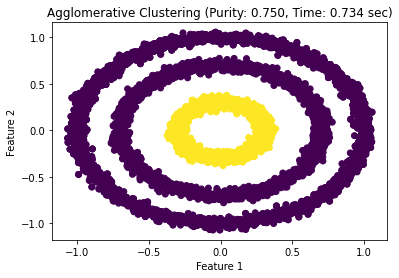

In [65]:
# Aglomerative 1 - case 4
# Code whihc ourput time, purity, distinguishable plot 
#conclusive line
clustering = AgglomerativeClustering(linkage ='single')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X4)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y4, clustering.labels_)

# Plot the clustered data
plt.scatter(X4[0], X4[1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# the performance of clustering algorithm is average as it coulnt really work good with dense region.

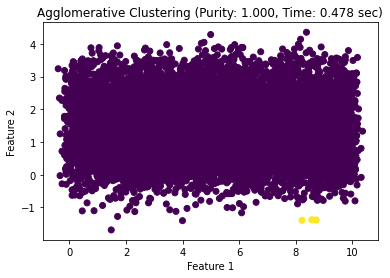

In [66]:
# Aglomerative 1 - case 5
# Code whihc ourput time, purity, distinguishable plot 


clustering = AgglomerativeClustering(linkage ='single')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X5)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y5, clustering.labels_)

# Plot the clustered data
plt.scatter(X5[:,0], X5[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#The performance of clustering algorithm is perfect as seen by 100% purity score.

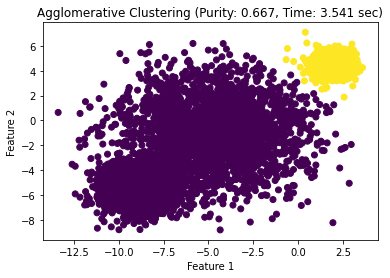

In [67]:
# Aglomerative 2 - case 1
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage ='average')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X1)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y1, clustering.labels_)

# Plot the clustered data
plt.scatter(X1[:, 0], X1[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#Agglomerative clustering with average linkage performed a little well for the given dataset since it tends to create compact and well-separated clusters. 

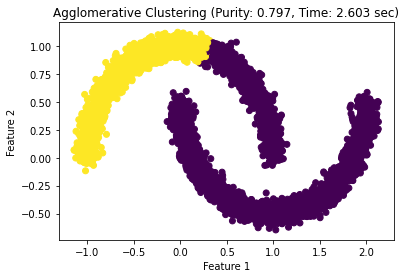

In [68]:
# Aglomerative 2 - case 2
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage='average')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X2)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y2, clustering.labels_)

# Plot the clustered data
plt.scatter(X2[:, 0], X2[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# The performance of clustering algorithm is just averag. It couldnt really identified teh clusters properly.

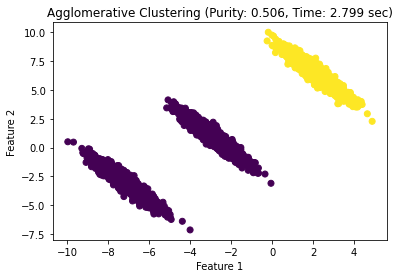

In [69]:
# Aglomerative 2 - case 3
# Code which output time, purity, distinguishable plot 


clustering = AgglomerativeClustering(linkage='average')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X3)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y2, clustering.labels_)

# Plot the clustered data
plt.scatter(X3[:, 0], X3[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#The performance of clustering algorithm with this data se is poor. it just recogonized one cluster properly.

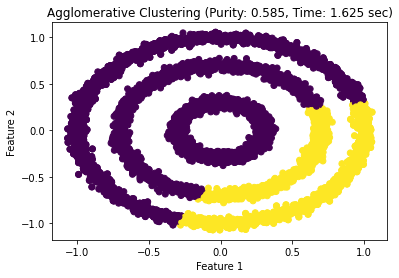

In [70]:
# Aglomerative 2 - case 4
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage ='average')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X4)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y4, clustering.labels_)

# Plot the clustered data
plt.scatter(X4[0], X4[1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#The performance of clustring algorithm is sligthy better for this dataset but is still not perfect.

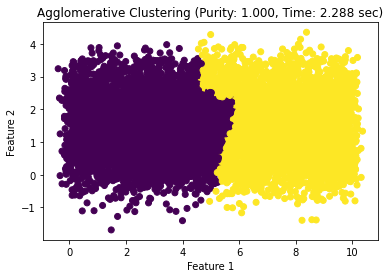

In [71]:
# Aglomerative 2 - case 5
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage ='average')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X5)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y5, clustering.labels_)

# Plot the clustered data
plt.scatter(X5[:,0], X5[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#The performance of clustering algorithm is perfect as seen with the purity score of 100%.

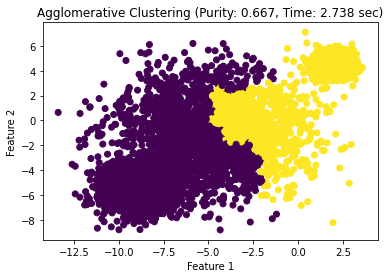

In [72]:
# Aglomerative 3 - case 1
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage ='complete')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X1)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y1, clustering.labels_)

# Plot the clustered data
plt.scatter(X1[:, 0], X1[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#Agglomerative clustering with complete linkage is a little effective for the given dataset since it tends to create small and dense clusters that may not capture the overall structure of the data points

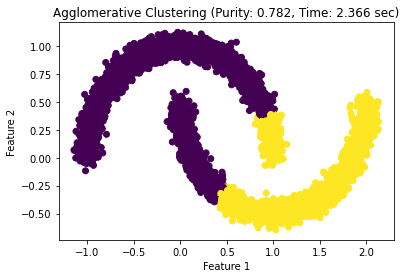

In [73]:
# Aglomerative 3 - case 2
# Code whihc ourput time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage='complete')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X2)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y2, clustering.labels_)

# Plot the clustered data
plt.scatter(X2[:, 0], X2[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#The performance of clustering algorithm is just average it couldnt really identified the cluster properly.

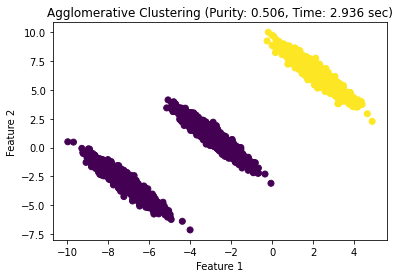

In [74]:
# Aglomerative 3 - case 3
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage='complete')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X3)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y2, clustering.labels_)

# Plot the clustered data
plt.scatter(X3[:, 0], X3[:, 1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# The performance of clustering algorithm is bad it just identified one cluster properly.

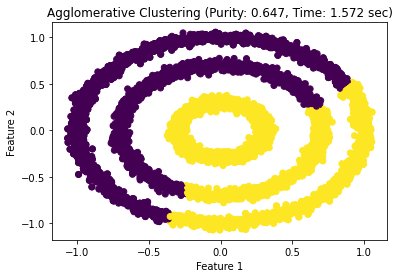

In [75]:
# Aglomerative 3 - case 4
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage ='complete')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X4)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y4, clustering.labels_)

# Plot the clustered data
plt.scatter(X4[0], X4[1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# The clustering algorithm couldnt really identified the cluster properly.


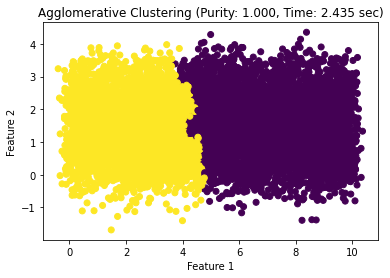

In [76]:
# Aglomerative 3 - case 5
# Code which output time, purity, distinguishable plot 

clustering = AgglomerativeClustering(linkage ='complete')

# Fit the clustering algorithm to the dataset
start_time = time.time()
clustering.fit(X5)
end_time = time.time()

# Compute the purity of the clustering
purity = purity_score(y5, clustering.labels_)

# Plot the clustered data
plt.scatter(X5[:,0], X5[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Agglomerative Clustering (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# The clustering algorithm has identified the clusters perfectly as seen with 100% purity score

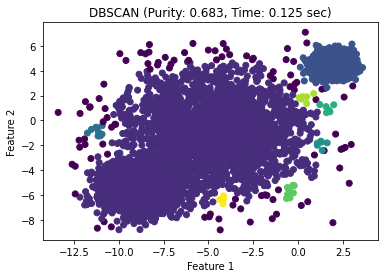

In [77]:
# Dbscan - case 1
# Code which output time, purity, distinguishable plot

clustering = DBSCAN(eps=0.5, min_samples=5)


start_time = time.time()
clustering.fit(X1)
end_time = time.time()
purity = purity_score(y1, clustering.labels_)

plt.scatter(X1[:,0], X1[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
#DBSCAN accurately identify well-separated clusters but may struggle with closely-packed or varying density points. Its performanace is average in this case.

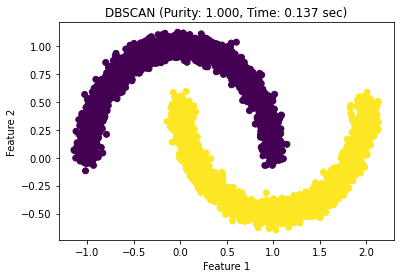

In [78]:
# Dbscan - case 2
# Code which output time, purity, distinguishable plot

clustering = DBSCAN(eps=0.2, min_samples=5)


start_time = time.time()
clustering.fit(X2)
end_time = time.time()
purity = purity_score(y2, clustering.labels_)

plt.scatter(X2[:,0], X2[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# the clustering algorithm works great with dense regions and it has identified the clusters perfectly as seen with 100% purity

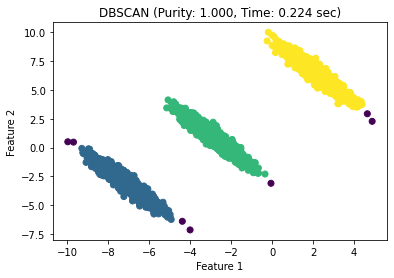

In [79]:
# Dbscan - case 3
# Code which output time, purity, distinguishable plot

clustering = DBSCAN(eps=0.5, min_samples=5)


start_time = time.time()
clustering.fit(X3)
end_time = time.time()
purity = purity_score(y3, clustering.labels_)

plt.scatter(X3[:,0], X3[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# the clustering algorithm works great with dense regions and it has identified the clusters perfectly as seen with 100% purity. It has also identified a little noise.

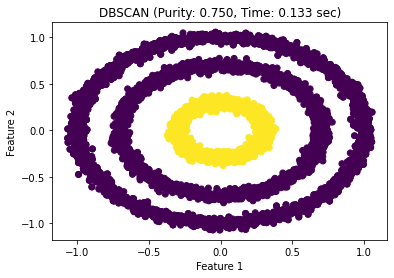

In [80]:
# Dbscan - case 4
# Code which output time, purity, distinguishable plot 

clustering = DBSCAN(eps=0.2, min_samples=5)


start_time = time.time()
clustering.fit(X4)
end_time = time.time()
purity = purity_score(y4, clustering.labels_)

plt.scatter(X4[0], X4[1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# the clustering algorithm has worked average for the given dataset

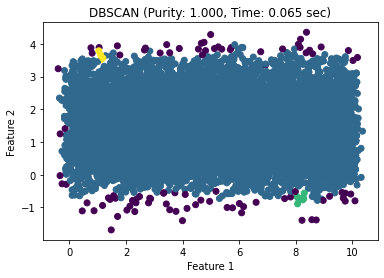

In [81]:
# Dbscan - case 5
# Code which output time, purity, distinguishable plot

clustering = DBSCAN(eps=0.2, min_samples=5)


start_time = time.time()
clustering.fit(X5)
end_time = time.time()
purity = purity_score(y5, clustering.labels_)

plt.scatter(X5[:,0], X5[:,1], c=clustering.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN (Purity: {purity:.3f}, Time: {end_time-start_time:.3f} sec)")
plt.show()
#conclusive line
# the clustering algorithm works great with dense regions and it has identified the clusters perfectly as seen with 100% purity. It has also identified a little noise.

In [ ]:
# Happy Ramazan :)